In [1489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [1490]:
df = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/archive/DATASET/TRAIN/keypoints_train.csv")
df

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,00000128.jpg,downdog,0.440124,0.712295,0.998452,0.412804,0.717766,0.997915,0.410324,0.713550,...,0.380921,0.928035,0.784017,0.015459,0.816221,0.858528,0.299022,0.815818,0.839378,0.009387
1,00000129.jpg,downdog,0.371130,0.701247,0.998017,0.348296,0.687207,0.997628,0.347761,0.681149,...,0.437749,0.892910,0.845554,0.029323,0.771399,0.893479,0.304541,0.774027,0.883284,0.018414
2,00000130.jpg,downdog,0.415670,0.685219,0.998732,0.384867,0.696123,0.997844,0.382136,0.692437,...,0.847196,0.932688,0.767949,0.049558,0.832070,0.837032,0.810723,0.817911,0.805197,0.040440
3,00000131.jpg,downdog,0.587593,0.561438,0.993871,0.569559,0.582145,0.990642,0.567109,0.581242,...,0.886942,0.846717,0.646290,0.051215,0.841602,0.733564,0.869181,0.800236,0.698470,0.060326
4,00000132.png,downdog,0.601035,0.707055,0.988630,0.619243,0.717875,0.968945,0.620829,0.714112,...,0.057365,0.284081,0.919305,0.750763,0.389930,0.922398,0.054586,0.379092,0.932374,0.649463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,00000433.jpg,warrior2,0.565274,0.148571,0.999933,0.573448,0.128280,0.999701,0.578126,0.128949,...,0.901219,0.470371,0.960092,0.961100,0.807191,0.984736,0.981931,0.400583,0.968428,0.986891
1077,00000434.jpg,warrior2,0.541041,0.408194,0.999972,0.548151,0.397850,0.999913,0.550769,0.398448,...,0.992860,0.541439,0.864351,0.992673,0.786477,0.862301,0.998574,0.485847,0.874985,0.994076
1078,00000436.jpg,warrior2,0.403254,0.542853,0.999996,0.413754,0.536118,0.999990,0.417661,0.536789,...,0.968524,0.289490,0.803095,0.994612,0.594817,0.854795,0.995955,0.222655,0.796331,0.998290
1079,00000437.jpg,warrior2,0.437052,0.183579,0.999983,0.445386,0.162379,0.999893,0.450761,0.161676,...,0.713048,0.299636,0.916496,0.875251,0.811379,0.917311,0.924524,0.214214,0.924746,0.931454


In [1491]:
df.shape

(1081, 101)

In [1492]:
df_test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/archive/DATASET/TEST/keypoints_test.csv")
df_test.shape

(470, 101)

In [1493]:
df[df['NOSE_x']==0].shape

(70, 101)

In [1494]:
df = df.drop(df[df['NOSE_x']==0].index)
df

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,00000128.jpg,downdog,0.440124,0.712295,0.998452,0.412804,0.717766,0.997915,0.410324,0.713550,...,0.380921,0.928035,0.784017,0.015459,0.816221,0.858528,0.299022,0.815818,0.839378,0.009387
1,00000129.jpg,downdog,0.371130,0.701247,0.998017,0.348296,0.687207,0.997628,0.347761,0.681149,...,0.437749,0.892910,0.845554,0.029323,0.771399,0.893479,0.304541,0.774027,0.883284,0.018414
2,00000130.jpg,downdog,0.415670,0.685219,0.998732,0.384867,0.696123,0.997844,0.382136,0.692437,...,0.847196,0.932688,0.767949,0.049558,0.832070,0.837032,0.810723,0.817911,0.805197,0.040440
3,00000131.jpg,downdog,0.587593,0.561438,0.993871,0.569559,0.582145,0.990642,0.567109,0.581242,...,0.886942,0.846717,0.646290,0.051215,0.841602,0.733564,0.869181,0.800236,0.698470,0.060326
4,00000132.png,downdog,0.601035,0.707055,0.988630,0.619243,0.717875,0.968945,0.620829,0.714112,...,0.057365,0.284081,0.919305,0.750763,0.389930,0.922398,0.054586,0.379092,0.932374,0.649463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,00000433.jpg,warrior2,0.565274,0.148571,0.999933,0.573448,0.128280,0.999701,0.578126,0.128949,...,0.901219,0.470371,0.960092,0.961100,0.807191,0.984736,0.981931,0.400583,0.968428,0.986891
1077,00000434.jpg,warrior2,0.541041,0.408194,0.999972,0.548151,0.397850,0.999913,0.550769,0.398448,...,0.992860,0.541439,0.864351,0.992673,0.786477,0.862301,0.998574,0.485847,0.874985,0.994076
1078,00000436.jpg,warrior2,0.403254,0.542853,0.999996,0.413754,0.536118,0.999990,0.417661,0.536789,...,0.968524,0.289490,0.803095,0.994612,0.594817,0.854795,0.995955,0.222655,0.796331,0.998290
1079,00000437.jpg,warrior2,0.437052,0.183579,0.999983,0.445386,0.162379,0.999893,0.450761,0.161676,...,0.713048,0.299636,0.916496,0.875251,0.811379,0.917311,0.924524,0.214214,0.924746,0.931454


In [1495]:
df_test = df_test.drop(df_test[df_test['NOSE_x']==0].index)
df_test

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,00000000.jpg,downdog,0.518041,0.748229,0.996715,0.496246,0.770454,0.994147,0.492401,0.767457,...,0.711749,0.875316,0.853277,0.032914,0.790556,0.917257,0.686648,0.778203,0.887947,0.024931
1,00000001.JPG,downdog,0.568384,0.794966,0.996718,0.585623,0.796628,0.988688,0.587648,0.791927,...,0.090515,0.145136,0.861526,0.866537,0.244871,0.892785,0.082549,0.233992,0.899532,0.809025
2,00000002.jpg,downdog,0.597672,0.727519,0.994068,0.623616,0.736695,0.974415,0.627130,0.732789,...,0.177954,0.058003,0.863048,0.929820,0.198267,0.877265,0.182643,0.188998,0.901370,0.896984
3,00000003.jpg,downdog,0.542276,0.765826,0.996071,0.559462,0.786569,0.987848,0.561753,0.785220,...,0.046421,0.161253,0.860851,0.595174,0.287254,0.871855,0.038531,0.274493,0.879333,0.559977
4,00000004.jpg,downdog,0.367977,0.682554,0.998484,0.345258,0.706791,0.997282,0.340956,0.703147,...,0.630958,0.846847,0.829156,0.022789,0.731987,0.898547,0.516544,0.731793,0.878446,0.013905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,00000113.jpg,warrior2,0.418320,0.366823,0.999943,0.424715,0.352688,0.999694,0.427063,0.352594,...,0.896160,0.309664,0.888575,0.945201,0.666061,0.870599,0.971312,0.248497,0.877075,0.962714
466,00000114.jpg,warrior2,0.558272,0.239163,0.999995,0.554771,0.221684,0.999961,0.555564,0.222100,...,0.907883,0.042246,0.874702,0.807891,0.810887,0.880098,0.920083,0.015335,0.906513,0.906469
467,00000115.png,warrior2,0.445629,0.200483,0.999961,0.466639,0.175543,0.999899,0.479949,0.176745,...,0.864177,0.409452,0.889302,0.922412,0.846820,0.908392,0.961391,0.290031,0.913098,0.960538
468,00000116.jpg,warrior2,0.333288,0.057333,0.955677,0.343112,0.027521,0.886748,0.349811,0.023887,...,0.159909,0.350117,1.009115,0.274611,0.974429,1.146521,0.221239,0.284952,1.125330,0.221336


In [1496]:
df[df['NOSE_x']==0].shape

(0, 101)

In [1497]:
df.labels.unique()

array(['downdog', 'goddess', 'plank', 'tree', 'warrior2'], dtype=object)

In [1498]:
df.labels[df.labels=='downdog']=0
df.labels[df.labels=='goddess']=1
df.labels[df.labels=='plank']=2
df.labels[df.labels=='tree']=3
df.labels[df.labels=='warrior2']=4

df_test.labels[df_test.labels=='downdog']=0
df_test.labels[df_test.labels=='goddess']=1
df_test.labels[df_test.labels=='plank']=2
df_test.labels[df_test.labels=='tree']=3
df_test.labels[df_test.labels=='warrior2']=4

<ipython-input-1498-67b7680af21f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='downdog']=0
<ipython-input-1498-67b7680af21f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='goddess']=1
<ipython-input-1498-67b7680af21f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='plank']=2
<ipython-input-1498-67b7680af21f>:4: SettingWithCopyWarning: 
A value is trying to be set 

In [1499]:
df.labels

0       0
1       0
2       0
3       0
4       0
       ..
1076    4
1077    4
1078    4
1079    4
1080    4
Name: labels, Length: 1011, dtype: object

In [1500]:
x = df.drop(['file_name', 'labels'], axis=1)
y = df.labels

In [1501]:
x_test = df_test.drop(['file_name', 'labels'], axis=1)
y_test = df_test.labels

In [1502]:
y = y.astype('float64')
y_test = y_test.astype('float64')

In [1503]:
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [1504]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1505]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [1506]:
print(x_train.shape)
print(y_train.shape)

(808, 99)
(808, 5)


In [1507]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(99,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 128)               12800     
                                                                 
 dropout_123 (Dropout)       (None, 128)               0         
                                                                 
 dense_185 (Dense)           (None, 256)               33024     
                                                                 
 dropout_124 (Dropout)       (None, 256)               0         
                                                                 
 dense_186 (Dense)           (None, 64)                16448     
                                                                 
 dropout_125 (Dropout)       (None, 64)                0         
                                                                 
 dense_187 (Dense)           (None, 5)               

In [1508]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [1509]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/archive/DATASET/weights.best_ann.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [1510]:
history = model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystopping])

Epoch 1/200
16/26 [=================>............] - ETA: 0s - loss: 1.5983 - accuracy: 0.2480 
Epoch 1: val_accuracy improved from -inf to 0.54680, saving model to /content/drive/MyDrive/UGP23/dataset/archive/DATASET/weights.best_ann.hdf5
26/26 [==============================] - 2s 27ms/step - loss: 1.5535 - accuracy: 0.2871 - val_loss: 1.3201 - val_accuracy: 0.5468
Epoch 2/200
20/26 [======================>.......] - ETA: 0s - loss: 1.2560 - accuracy: 0.4875
Epoch 2: val_accuracy improved from 0.54680 to 0.59113, saving model to /content/drive/MyDrive/UGP23/dataset/archive/DATASET/weights.best_ann.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 1.2417 - accuracy: 0.4901 - val_loss: 1.0549 - val_accuracy: 0.5911
Epoch 3/200
15/26 [================>.............] - ETA: 0s - loss: 1.0781 - accuracy: 0.5271
Epoch 3: val_accuracy improved from 0.59113 to 0.64532, saving model to /content/drive/MyDrive/UGP23/dataset/archive/DATASET/weights.best_ann.hdf5
26/26 [==========

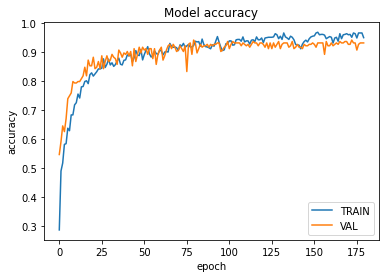

In [1511]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [1512]:
model.evaluate(x_train, y_train)

26/26 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9851


[0.0683358684182167, 0.9851484894752502]

In [1513]:
model.evaluate(x_val, y_val)

7/7 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.9310


[0.4769343137741089, 0.931034505367279]

In [1514]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9606


[0.13949666917324066, 0.9606127142906189]

In [1515]:
y_pred = model.predict(x_test)

15/15 [==============================] - 0s 2ms/step


In [1516]:
y_pred

array([[9.99978006e-01, 7.13724617e-08, 2.18687146e-05, 1.63202341e-09,
        1.16937340e-08],
       [9.74296212e-01, 2.88608732e-07, 2.57033948e-02, 9.95505900e-09,
        8.43249310e-08],
       [9.65154946e-01, 2.71655143e-08, 3.48449610e-02, 9.29076038e-10,
        1.19346755e-08],
       ...,
       [1.41224810e-08, 6.29897520e-04, 2.42334909e-06, 9.72277636e-09,
        9.99367654e-01],
       [4.48163165e-12, 2.70870419e-06, 4.34110348e-09, 8.43604527e-12,
        9.99997199e-01],
       [3.09704068e-10, 2.18179284e-05, 1.61968600e-07, 4.92418745e-11,
        9.99978065e-01]], dtype=float32)

In [1517]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,

In [1518]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size

for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'downdog'    
    if(y_test[i]==1): pose_test[i] = 'goddess'  
    if(y_test[i]==2): pose_test[i] = 'plank'     
    if(y_test[i]==3): pose_test[i] = 'tree'     
    if(y_test[i]==4): pose_test[i] = 'warrior2'

for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'downdog' 
    if(y_pred[i]==1): pose_pred[i] = 'goddess' 
    if(y_pred[i]==2): pose_pred[i] = 'plank'   
    if(y_pred[i]==3): pose_pred[i] = 'tree'    
    if(y_pred[i]==4): pose_pred[i] = 'warrior2'

In [1519]:
confusion_matrix(pose_test, pose_pred)

array([[ 82,   0,   6,   0,   0],
       [  0,  69,   1,   1,   9],
       [  0,   0, 114,   0,   0],
       [  0,   1,   0,  67,   0],
       [  0,   0,   0,   0, 107]])

In [1520]:
pip install -q scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

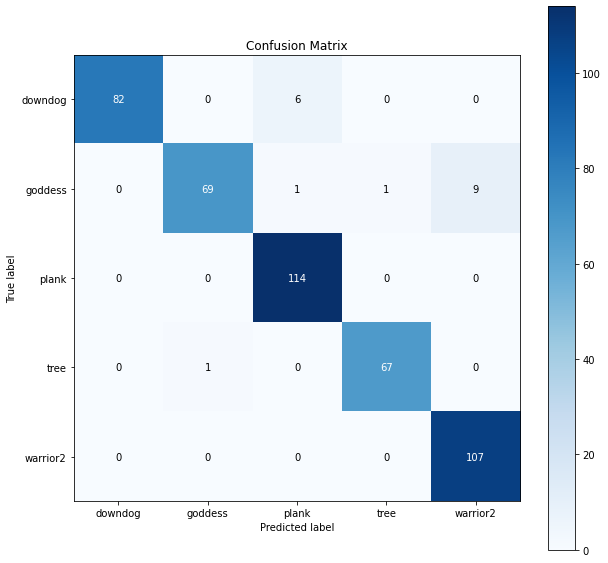

In [1521]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))